In [1]:
import numpy as np
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Интерполяция многочленами и сплайнами

### Пример 1.
Простая функция: равна нулю везде, кроме нуля

In [2]:
n = 9
x = np.arange(-n//2+1, n//2+1)
xx = np.linspace(min(x), max(x), (n-1)*10+1)
y = x*0
y[n//2] = 1

Интерполируем полиномом и сплайном

In [3]:
a = np.polyfit(x, y, deg=n-1)
P = np.poly1d(a)
yy1 = P(xx)

yy2 = CubicSpline(x, y)(xx)

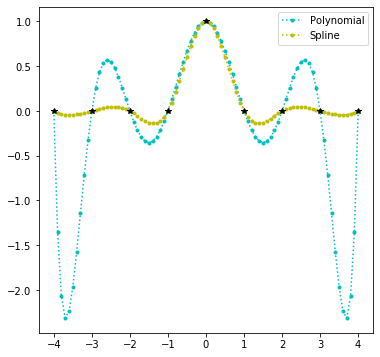

In [4]:
plt.figure(figsize=(6, 6))
plt.plot(xx, yy1, 'c.:', label='Polynomial')
plt.plot(xx, yy2, 'y.:', label='Spline')
plt.plot(x, y, 'k*')
plt.legend();

### Пример 2.
Полином 5-го порядка: x^5 + 2x^4 + 3x^3 + 4x^2 + 5x + 6

In [5]:
n = 9
x = np.arange(-n//2+1, n//2+1)
xx = np.linspace(min(x), max(x), (n-1)*10+1)

Q = np.poly1d(np.arange(6)+1)

y = Q(x)

Интерполируем полиномом и сплайном

In [6]:
yy0 = Q(xx)

a = np.polyfit(x, y, deg=n-1)
P = np.poly1d(a)
yy1 = P(xx)

yy2 = CubicSpline(x, y)(xx)

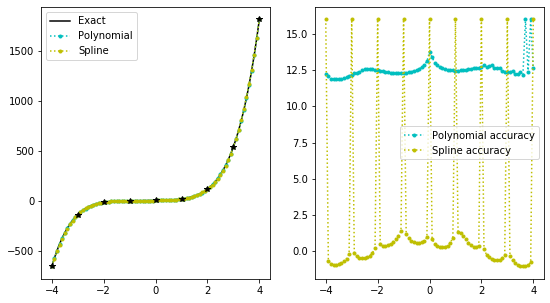

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(9,5))
ax1.plot(xx, yy0, 'k-', label='Exact')
ax1.plot(xx, yy1, 'c.:', label='Polynomial')
ax1.plot(xx, yy2, 'y.:', label='Spline')
ax1.plot(x, y, 'k*')
ax1.legend()

eps = 1e-16
ax2.plot(xx, -np.log10(np.clip(np.abs(yy0-yy1), eps, np.inf)), 'c.:', label='Polynomial accuracy')
ax2.plot(xx, -np.log10(np.clip(np.abs(yy0-yy2), eps, np.inf)), 'y.:', label='Spline accuracy')
ax2.legend();

Почему в первом случае сплайны лучше? Почему во втором они хуже?